<span style="font-size:24px;">***Binary Classification Model - Training Exercise***</span>

### Exercise: Train a Neural Network using PyTorch

This exercise is about implementing the **training loop** for a simple binary classifier using PyTorch. The Neural Network is consisted of **4** neurons at the input layer, **64** neurons at the hidden layer and a single output neuron. The chosen loss function is `BCELoss()` and `Adam` is used as an optimizer.

The dataset, model, optimizer, and loss function are already provided. Your job is:

- Run the training loop for a fixed number of epochs. 
- Compute the training loss and test loss.  
- Evaluate accuracy at each epoch.  
- Achieve satisfactory accuracy ~95%.

### Dataset

- The dataset comes from the iris dataset. 
- It is consisted of **4** features and a binary label (**0** or **1**).
- Originally `iris.target` is consisted of 3 unique values (**0**, **1**, **2**). To guarantee binary labels we only use the first **100** data points.
- Features are parsed to varibale `X` and labels are parsed to varible `y`.

### What you’ll learn

- How to structure a clean PyTorch training loop  
- Using `.train()` and `.eval()` modes properly  
- Disabling gradient tracking with `torch.no_grad()`  
- Tracking and plotting losses and accuracy over time

### Python libraries

- **PyTorch** for modeling and training  
- **scikit-learn** for preprocessing  
- **matplotlib** for visualizations  
- **tqdm** for progress tracking  

### Instructions

- This assignment is consisted of **13** cells. 
- You should execute each cell in sequence.
- The Neural Network model is defined in cell number **7**. 
- **Your code should be inserted in cell number 9**. 
- Make sure you record values for `test_losses`, `train_losses`, `accuracies` for each `epoch`.
- Accuracy values must be between 0 and 1.
- In order to visualize your results you can plot losses and accuracies running cell **10** and **11** respectively.
- Your grade can obtained running cell **12**.
- Solution for this work can be found at the last cell. 
- Please, only check solution after you have worked and debugged your own code.

### Good Luck!

<span style="font-size:18px;">***1. Importing torch, sklearn, matplotlib and tqdm libraries***.</span>

In [32]:
import torch
import torch.optim as optim
import torch.nn as nn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tqdm import tqdm

<span style="font-size:18px;">***2. Importing data***.</span>

In [33]:
#Load iris dataset
iris = load_iris()

#Extract the features and target variables
X = iris.data
y = iris.target
X = X[0:100, :]
y = y[0:100]


<span style="font-size:18px;">***3. Splitting Data into Training and Testing***.</span>

In [34]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
#random_state=42 guarantees the split will be always the same
#stratify=y maintains proportion of labels for train and test data


<span style="font-size:18px;">***4. Verifying dimensions of train and test data.***.</span>

In [35]:
display(f'X_train shape: {X_train.shape}')
display(f'y_train shape: {y_train.shape}')
display(f'X_test shape: {X_test.shape}')
display(f'y_test shape: {y_test.shape}')

'X_train shape: (80, 4)'

'y_train shape: (80,)'

'X_test shape: (20, 4)'

'y_test shape: (20,)'

<span style="font-size:18px;">***5. Normalizing Data***.</span>

In [36]:
# Standardize the data
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test = scaler.transform(X_test)

<span style="font-size:18px;">***6. Converting data from numpy to tensor***.</span>

In [37]:
# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

<span style="font-size:18px;">***7. Building the Neural Network model***.</span>

In [59]:
class ClassificationNet(nn.Module):
    def __init__(self, input_units, hidden_units, output_units):
        super(ClassificationNet, self).__init__()
        self.fc1 = nn.Linear(input_units, hidden_units) # linear function defined with 4 inputs and  64 outputs.
        self.fc2 = nn.Linear(hidden_units, output_units) # linear function defined with 64 inputs and 1 output.
        self.sigmoid = nn.Sigmoid() # sigmoid function to guarantee positive output values.

    def forward(self, x): # forward propagation of the Neural Network.
        x = self.fc1(x) # first Linear operation called.
        x = self.fc2(x) # second Linear operation called.
        x = self.sigmoid(x) # sigmoid function applied (values between 0 and 1).
        return x

# Instantiate the model
model = ClassificationNet(input_units=4, hidden_units=64, output_units=1) # nn consisting of 4 inputs, 1 hidden layer of 64 neurons and a single output neuron.
print(model)

ClassificationNet(
  (fc1): Linear(in_features=4, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


<span style="font-size:18px;">***8. Defining Binary Cross Entropy as the Loss function and Adam as the chosen optimizer***.</span>

In [60]:
# Define the loss function and optimizer
criterion = nn.BCELoss() # binary cross entropy as loss function to train the model
optimizer = optim.Adam(model.parameters(), lr=10e-4) # adam as an optimizer, learning rate of 0.005

<span style="font-size:18px;">***9. Training Assignment***.</span>

In [47]:
def training_assignment():
    """This function trains the model"""
    train_losses = []
    test_losses = []
    accuracies = []
    """epochs = Choose the proper number of epochs.""" 

    for epoch in tqdm(range(epochs), desc="Training Progress"):
        #Training Phase
        
        """Your code should be inserted here."""
        
  


        
        #Evaluation Phase
        accuracy = 0.0
        with torch.no_grad():
            
            """Your code should be inserted here."""





            
  
        print(f"Epoch {epoch + 1}: Train Loss = {loss.item():.4f}, Test Loss = {loss_test.item():.4f}, Accuracy = {accuracy:.4f}")
    return train_losses, test_losses, accuracies

<span style="font-size:18px;">***9. Start Training the Model***.</span>

In [61]:
train_losses, test_losses, accuracies = training_solution() # train the model

Training Progress: 100%|██████████| 50/50 [00:00<00:00, 1508.87it/s]

Epoch 1: Train Loss = 0.7567, Test Loss = 0.7430, Accuracy = 0.4500
Epoch 2: Train Loss = 0.7341, Test Loss = 0.7201, Accuracy = 0.4500
Epoch 3: Train Loss = 0.7119, Test Loss = 0.6977, Accuracy = 0.5000
Epoch 4: Train Loss = 0.6903, Test Loss = 0.6758, Accuracy = 0.5000
Epoch 5: Train Loss = 0.6691, Test Loss = 0.6544, Accuracy = 0.5500
Epoch 6: Train Loss = 0.6484, Test Loss = 0.6336, Accuracy = 0.7000
Epoch 7: Train Loss = 0.6283, Test Loss = 0.6133, Accuracy = 0.7000
Epoch 8: Train Loss = 0.6086, Test Loss = 0.5936, Accuracy = 0.7500
Epoch 9: Train Loss = 0.5894, Test Loss = 0.5743, Accuracy = 0.8500
Epoch 10: Train Loss = 0.5708, Test Loss = 0.5557, Accuracy = 0.9500
Epoch 11: Train Loss = 0.5526, Test Loss = 0.5375, Accuracy = 1.0000
Epoch 12: Train Loss = 0.5350, Test Loss = 0.5199, Accuracy = 1.0000
Epoch 13: Train Loss = 0.5178, Test Loss = 0.5028, Accuracy = 1.0000
Epoch 14: Train Loss = 0.5012, Test Loss = 0.4863, Accuracy = 1.0000
Epoch 15: Train Loss = 0.4851, Test Loss = 

<span style="font-size:18px;">***10. Plot Train and Test Losses***.</span>

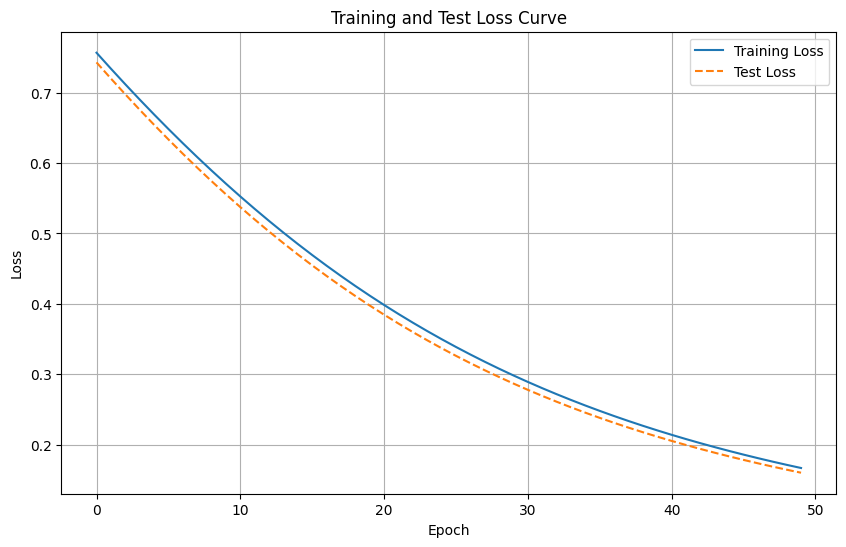

In [62]:
# Plot the loss curves
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Curve')
plt.legend()
plt.grid(True)
plt.show()

<span style="font-size:18px;">***11. Plot Model Accuracy***.</span>

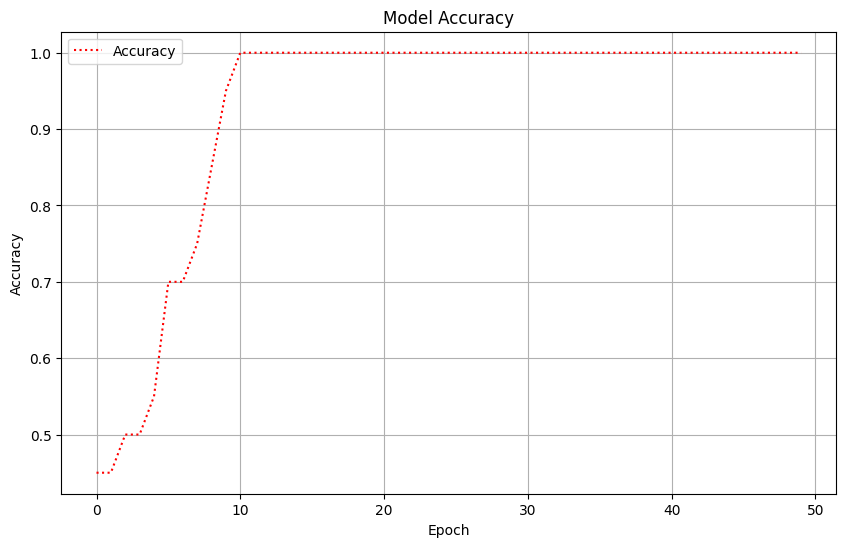

In [63]:
# Plot the accuracy curve
plt.figure(figsize=(10, 6))
plt.plot(accuracies, label='Accuracy', linestyle=':', color='red')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.grid(True)
plt.show()

<span style="font-size:18px;">***12. Grading***.</span>

In [66]:
import unittest

class GradedModelTrainingTest(unittest.TestCase):
    max_grade = 100
    feedback = []

    @classmethod
    def setUpClass(cls):
        cls.epochs = 50
        cls.train_loss, cls.test_loss, cls.accuracy = train_losses, test_losses, accuracies
        GradedModelTrainingTest.grade = 0
    def test_output_lengths(self):
        try:
            self.assertEqual(len(self.train_loss), self.epochs)
            self.assertEqual(len(self.test_loss), self.epochs)
            self.assertEqual(len(self.accuracy), self.epochs)
            GradedModelTrainingTest.grade += 20
        except AssertionError:
            GradedModelTrainingTest.feedback.append("Output lists do not match the number of epochs.")

    def test_train_loss_is_float_list(self):
        try:
            self.assertTrue(all(isinstance(l, float) for l in self.train_loss))
            GradedModelTrainingTest.grade += 10
        except AssertionError:
            GradedModelTrainingTest.feedback.append("Train loss must contain only float values.")

    def test_accuracy_between_0_and_1(self):
        try:
            self.assertTrue(all(0.0 <= a <= 1.0 for a in self.accuracy))
            GradedModelTrainingTest.grade += 20
        except AssertionError:
            GradedModelTrainingTest.feedback.append("Accuracy values must be between 0.0 and 1.0.")

    def test_train_loss_decreases1(self):
        try:
            self.assertLessEqual(self.train_loss[int(epochs / 2)], self.train_loss[0])
            GradedModelTrainingTest.grade += 10
        except AssertionError:
            GradedModelTrainingTest.feedback.append("Train loss did not decrease over time.")

    def test_train_loss_decreases2(self):
        try:
            self.assertLessEqual(self.train_loss[-1], self.train_loss[int(epochs / 2)])
            GradedModelTrainingTest.grade += 10
        except AssertionError:
            GradedModelTrainingTest.feedback.append("Train loss did not decrease over time.")


    def test_accuracy_value_80(self):
        try:
            self.assertTrue(self.accuracy[-1] > 0.8)
            GradedModelTrainingTest.grade += 5
        except AssertionError:
            GradedModelTrainingTest.feedback.append("Model accuracy is less than 80 percent. Improve Model.")

    def test_accuracy_value_90(self):
        try:
            self.assertTrue(self.accuracy[-1] > 0.9)
            GradedModelTrainingTest.grade += 10
        except AssertionError:
            GradedModelTrainingTest.feedback.append("Model accuracy is less than 90 percent. Improve Model.")

    def test_accuracy_value_95(self):
        try:
            self.assertTrue(self.accuracy[-1] > 0.95)
            GradedModelTrainingTest.grade += 15
        except AssertionError:
            GradedModelTrainingTest.feedback.append("Model accuracy is less than 95 percent. Improve Model.")
    

# Run the test suite and print grade
def grade_unittest():
    suite = unittest.TestLoader().loadTestsFromTestCase(GradedModelTrainingTest)
    runner = unittest.TextTestRunner(verbosity=0)
    runner.run(suite)

    print(f"Final Score: {GradedModelTrainingTest.grade}/{GradedModelTrainingTest.max_grade}")
    if GradedModelTrainingTest.feedback:
        print("Feedback:")
        for msg in GradedModelTrainingTest.feedback:
            print(" -", msg)
    else:
        print("All checks passed. Model accuracy higher than 95%!")


grade_unittest()

----------------------------------------------------------------------
Ran 8 tests in 0.000s

OK


Final Score: 100/100
All checks passed. Model accuracy higher than 95%!


<span style="font-size:18px;">***13. Solution***.</span>

In [51]:
def training_solution():
    """This function trains the newly created model"""
    train_losses = []
    test_losses = []
    accuracies = [] 
    epochs = 50

    for epoch in tqdm(range(epochs), desc="Training Progress"):
        #Training Phase
        model.train()
        optimizer.zero_grad() #optimizer paramters are set to zero.
        train_output = model(X_train) #forward computation of the NN.
        loss = criterion(train_output.squeeze(dim=1), y_train) #Loss function computation
        loss.backward() #back propogation is executed.
        optimizer.step() #parameters are updated.
        train_losses.append(loss.item())
        
        #Evaluation Phase
        accuracy = 0.0
        with torch.no_grad():
            model.eval()
            test_output = model(X_test) #forward propagation.
            loss_test = criterion(test_output.squeeze(dim=1), y_test) #Loss function computed using test batch
            test_losses.append(loss_test.item())

            predictions = (test_output.squeeze(dim=1) > 0.5).float() #predictions are computed following the procedeure: if testout> 0.5, prediction[epoch] = 1, else prediction[epoch] = 0
            correctness = (predictions == y_test).sum().item() #Check all correct values and sum it.
            accuracy = correctness / y_test.size(0) #accuracy computation
            accuracies.append(accuracy)
            
    #if (epoch + 1) % 5 == 0:
        print(f"Epoch {epoch + 1}: Train Loss = {loss.item():.4f}, Test Loss = {loss_test.item():.4f}, Accuracy = {accuracy:.4f}")
    return train_losses, test_losses, accuracies